In [1]:
#models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix

#packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#loading data from wine.csv file
data = pd.read_csv("wine.csv")
wine_data = data.copy()
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#number of existing data for each attribute
wine_data.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

In [4]:
#number of missing data for each attribute
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
#preprocess the data
#num_pipeline = Pipeline([
#    ("imputer", SimpleImputer(strategy="median")),
#    ("scaler", StandardScaler())
#])
#cat_pipeline = Pipeline([
    #return an array instead of sparse matrix
#    ("cat_encoder", OneHotEncoder(sparse=False))
#])

#num_attribs = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", "sulphates"]
#cat_attribs = ["type"]

#preprocess_pipeline = ColumnTransformer([
#    ("num", num_pipeline, num_attribs),
#    ("cat", cat_pipeline, cat_attribs)
#])

#wine_data_preprocessed = preprocess_pipeline.fit_transform(wine_data[num_attribs + cat_attribs])
#wine_data_preprocessed

In [7]:
#fill in the missing numerical values with median
for i in wine_data.columns:
    if (i != 'type'):
        wine_data[i].fillna(wine_data[i].median(), inplace=True)
        print("Median of %s is: %f" %(i, wine_data[i].median()))
print("\nMissing values: ")
wine_data.isna().sum()

Median of fixed acidity is: 7.000000
Median of volatile acidity is: 0.290000
Median of citric acid is: 0.310000
Median of residual sugar is: 3.000000
Median of chlorides is: 0.047000
Median of free sulfur dioxide is: 29.000000
Median of total sulfur dioxide is: 118.000000
Median of density is: 0.994890
Median of pH is: 3.210000
Median of sulphates is: 0.510000
Median of alcohol is: 10.300000
Median of quality is: 6.000000

Missing values: 


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#convert categorical values into numerical

wine_data['type'] = wine_data['type'].astype("category").cat.codes

In [9]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
#split input and output data
X = wine_data.drop("type", axis=1)
y = wine_data['type']

In [11]:
#removing the outliers so we can scale the data later
def visualize_remove_with_and_without_outliers(data, col_name):
    plt.figure(figsize=(25, 25))
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data = data, x = col_name, ax = axes[0], color='red').set_title("With outliers, Column: " + col_name)
    #if quantile is lower than q1 - 1.5 * iqr then it is equal to that, if it is higher than q3 + 1.5 * iqr
    #then it is equal to that, else it is the original value
    data[col_name] = data[col_name].apply(lambda q_value: q1 - 1.5 * iqr if q_value < (q1 - 1.5*iqr) 
                                          else (q3 + 1.5 * iqr if q_value > (q3 + 1.5 * iqr) else q_value))
    sns.boxplot(data = data, x = col_name, ax = axes[1], color='green').set_title("Without outliers, Column: " + col_name)
    plt.show()
    return data

<Figure size 1800x1800 with 0 Axes>

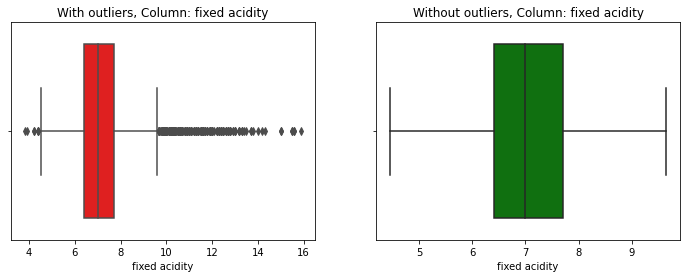

<Figure size 1800x1800 with 0 Axes>

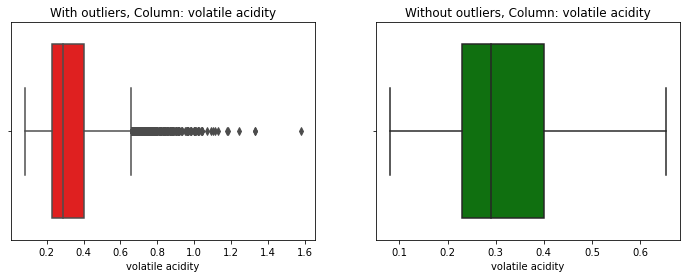

<Figure size 1800x1800 with 0 Axes>

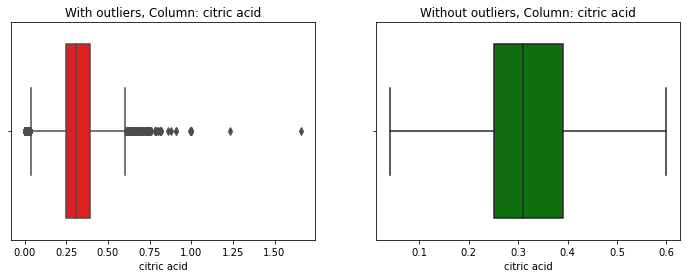

<Figure size 1800x1800 with 0 Axes>

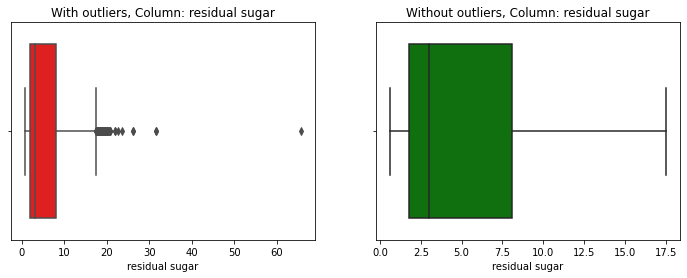

<Figure size 1800x1800 with 0 Axes>

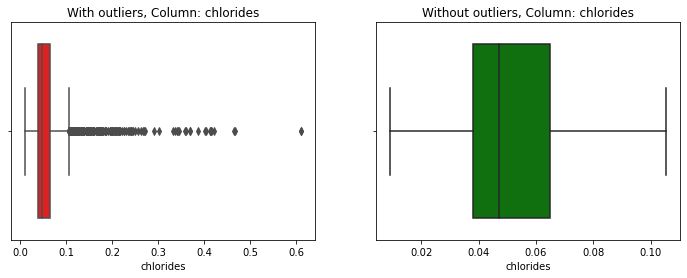

<Figure size 1800x1800 with 0 Axes>

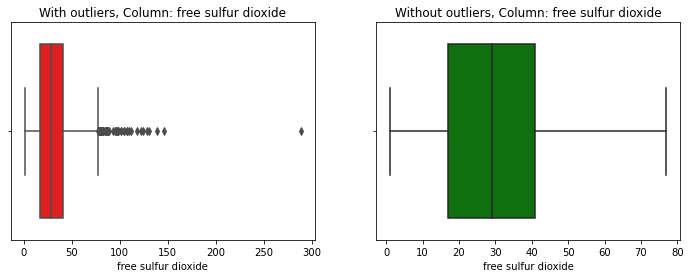

<Figure size 1800x1800 with 0 Axes>

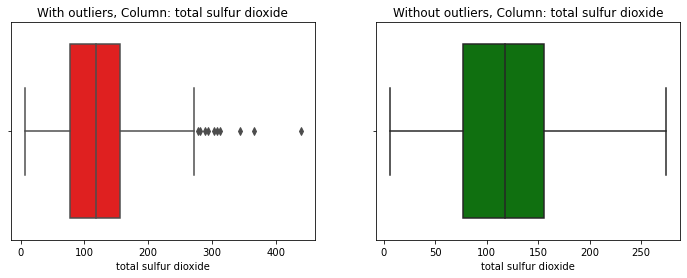

<Figure size 1800x1800 with 0 Axes>

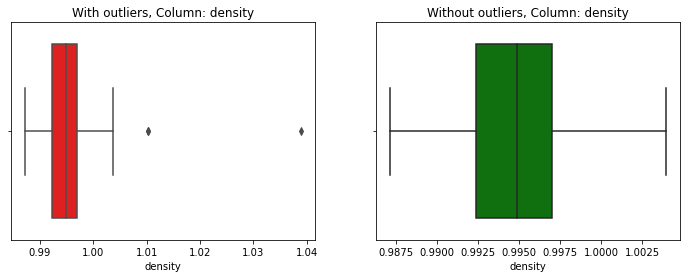

<Figure size 1800x1800 with 0 Axes>

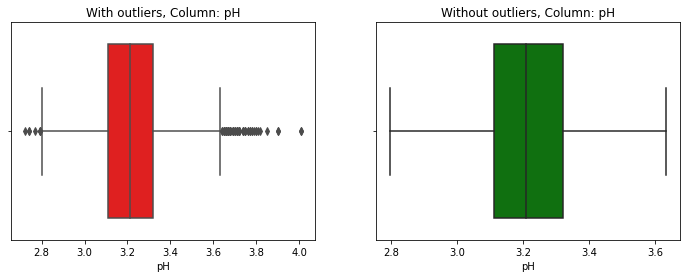

<Figure size 1800x1800 with 0 Axes>

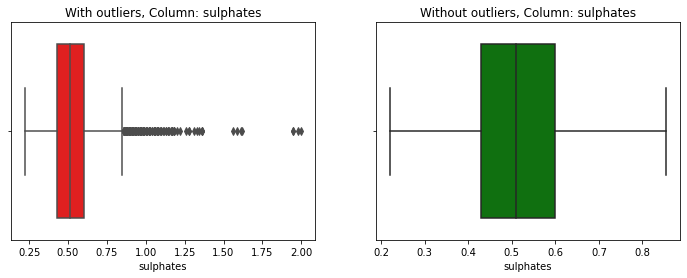

<Figure size 1800x1800 with 0 Axes>

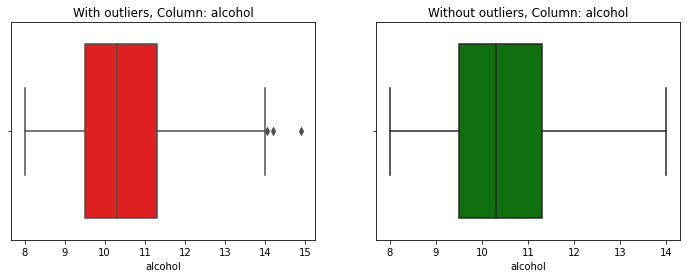

<Figure size 1800x1800 with 0 Axes>

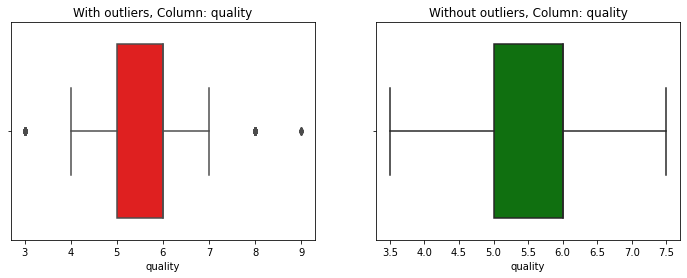

In [12]:
for column in X.columns:
    data = visualize_remove_with_and_without_outliers(wine_data, column)
plt.show()